In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import numpy as np

In [2]:
from  metal.utils import hard_to_soft
import torch

N = 1200
X = np.random.random((N,100)) * 2 - 1

Y = np.zeros((N,1))
Y[:,0] = (X[:,0] > X[:,1] + 0.5).astype(int) + 1

X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.long)

X_train = X[:1000]
X_dev   = X[1000:1100]
X_test  = X[1100:]

Y_train = Y[:1000, 0]
Y_dev   = Y[1000:1100]
Y_test  = Y[1100:, 0]

In [3]:
rs_max_search = 10

search_space = {
    'n_epochs': [10, 20, 50, 100, 200, 300],
    'batchnorm' : [True, False],
    'dropout': [0, .1, .2, .3, .4, .5],
    'lr': {'range': [1e-5, 1], 'scale': 'log'},
    'print_every': 50
}

In [4]:
# First run basic grid search / random search
from metal.label_model import LabelModel
from metal.end_model import EndModel
from metal.tuner import ModelTuner

def run_random_search(seed=123):
    tuner = ModelTuner(EndModel)
    init_args = []
    train_args = [X_train, Y_train]
    model, best_config, run_stats_random_search = tuner.search(init_args, train_args, X_dev, Y_dev, 
                                                               search_space, max_search=rs_max_search, metric='f1')
    return run_stats_random_search

In [5]:

# Hyperband
from metal.label_model import LabelModel
from metal.end_model import EndModel
from metal.tuner import HyperbandTuner

def run_hyperband(seed=123):    
    tuner = HyperbandTuner(EndModel, hyperband_epochs_budget=800, seed=seed)
    init_args = []
    train_args = [X_train, Y_train]

    model, best_config, run_stats_hyperband = tuner.search(init_args, train_args, X_dev, Y_dev, 
                                                           search_space)
    return run_stats_hyperband

In [6]:
#%%capture
seeds = [123, 234, 456, 567, 678]
#seeds = [123]
runstats_hyperband = []
runstats_rs = []
for seed in seeds:
    runstats_rs.append(run_random_search(seed=seed))
    runstats_hyperband.append(run_hyperband(seed=seed))
    
print(runstats_hyperband)
print(runstats_rs)


Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[1] Testing {'n_epochs': 20, 'batchnorm': True, 'dropout': 0.1, 'lr': 0.00027178756954662097}


/dfs/scratch0/maxlam/env3.6/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Saving model at iteration 0 with best score 0.52
[E:0]	Train Loss: 0.730	Dev score: 0.520
Saving model at iteration 1 with best score 0.58
Saving model at iteration 2 with best score 0.59
Saving model at iteration 3 with best score 0.67
Saving model at iteration 4 with best score 0.73
Saving model at iteration 6 with best score 0.78
Saving model at iteration 7 with best score 0.82
Saving model at iteration 9 with best score 0.85
Saving model at iteration 11 with best score 0.88
Saving model at iteration 16 with best score 0.89
[E:19]	Train Loss: 0.215	Dev score: 0.870
Restoring best model from iteration 16 with score 0.89
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      8    
 l=2     3     22    
F1: 0.903

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[2] Testin

Saving model at iteration 19 with best score 0.84
[E:19]	Train Loss: 0.413	Dev score: 0.840
Restoring best model from iteration 19 with score 0.84
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    62     12    
 l=2     8     18    
F1: 0.857

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[7] Testing {'n_epochs': 200, 'batchnorm': False, 'dropout': 0.5, 'lr': 0.01301692715442092}
Saving model at iteration 0 with best score 0.83
[E:0]	Train Loss: 0.541	Dev score: 0.830
Saving model at iteration 1 with best score 0.84
Saving model at iteration 2 with best score 0.88
Saving model at iteration 4 with best score 0.91
Saving model at iteration 5 with best score 0.95
Saving model at iteration 24 with best score 0.96
[E:50]	Train Loss: 0.005	Dev score: 0.910
[E:100]	Train Loss: 0.

Saving model at iteration 0 with best score 0.53
[E:0]	Train Loss: 0.709	Dev score: 0.530
Restoring best model from iteration 0 with score 0.53
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    53     23    
 l=2    17      7    
Accuracy: 0.540

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[4 Testing {'n_epochs': 1, 'batchnorm': True, 'dropout': 0.5, 'lr': 0.000903579845523744}
Saving model at iteration 0 with best score 0.49
[E:0]	Train Loss: 0.743	Dev score: 0.490
Restoring best model from iteration 0 with score 0.49
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    32     14    
 l=2    38     16    
Accuracy: 0.500

Network architecture:
Sequential(
  (0): Id

Saving model at iteration 0 with best score 0.59
[E:0]	Train Loss: 0.679	Dev score: 0.590
Restoring best model from iteration 0 with score 0.59
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    47     20    
 l=2    23     10    
Accuracy: 0.560

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[15 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0, 'lr': 0.004570749847134838}
Saving model at iteration 0 with best score 0.71
[E:0]	Train Loss: 0.577	Dev score: 0.710
Restoring best model from iteration 0 with score 0.71
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    70     29    
 l=2     0      1    
Accuracy: 0.710

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  

Saving model at iteration 0 with best score 0.76
[E:0]	Train Loss: 34.713	Dev score: 0.760
Restoring best model from iteration 0 with score 0.76
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    68     24    
 l=2     2      6    
Accuracy: 0.730

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[26 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0.2, 'lr': 0.0016691662727161567}
Saving model at iteration 0 with best score 0.7
[E:0]	Train Loss: 0.612	Dev score: 0.700
Restoring best model from iteration 0 with score 0.7
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    70     30    
 l=2     0      0    
Accuracy: 0.700

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bia

Saving model at iteration 0 with best score 0.74
[E:0]	Train Loss: 0.647	Dev score: 0.740
Saving model at iteration 1 with best score 0.83
Saving model at iteration 2 with best score 0.86
Saving model at iteration 3 with best score 0.88
[E:4]	Train Loss: 0.159	Dev score: 0.880
Restoring best model from iteration 3 with score 0.88
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    68      2    
 l=2     2     28    
Accuracy: 0.900

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[36 Testing {'n_epochs': 17, 'batchnorm': True, 'dropout': 0.3, 'lr': 0.019515100267567337}
Saving model at iteration 0 with best score 0.87
[E:0]	Train Loss: 0.458	Dev score: 0.870
Saving model at iteration 1 wit

Saving model at iteration 0 with best score 0.87
[E:0]	Train Loss: 0.518	Dev score: 0.870
Saving model at iteration 3 with best score 0.93
Saving model at iteration 4 with best score 0.97
[E:4]	Train Loss: 0.115	Dev score: 0.970
Restoring best model from iteration 4 with score 0.97
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    69      2    
 l=2     1     28    
Accuracy: 0.900

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[45 Testing {'n_epochs': 5, 'batchnorm': False, 'dropout': 0.3, 'lr': 2.5423201857064714e-05}
Saving model at iteration 0 with best score 0.41
[E:0]	Train Loss: 0.730	Dev score: 0.410
Saving model at iteration 2 with best score 0.42
Saving model at iteration 4 with best score 0.47
[E:4]	Train Loss: 0.718	Dev score: 0.470
Restoring best model from it

Saving model at iteration 0 with best score 0.59
[E:0]	Train Loss: 0.705	Dev score: 0.590
Saving model at iteration 1 with best score 0.67
Saving model at iteration 2 with best score 0.73
Saving model at iteration 3 with best score 0.75
Saving model at iteration 4 with best score 0.81
Saving model at iteration 6 with best score 0.86
Saving model at iteration 7 with best score 0.89
Saving model at iteration 11 with best score 0.92
Saving model at iteration 14 with best score 0.94
Saving model at iteration 15 with best score 0.96
[E:16]	Train Loss: 0.104	Dev score: 0.910
Restoring best model from iteration 15 with score 0.96
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    64      6    
 l=2     6     24    
Accuracy: 0.950

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

[E:50]	Train Loss: 0.041	Dev score: 0.900
[E:51]	Train Loss: 0.048	Dev score: 0.920
Restoring best model from iteration 15 with score 0.96
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    66      2    
 l=2     4     28    
Accuracy: 0.950

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[61 Testing {'n_epochs': 53, 'batchnorm': False, 'dropout': 0.4, 'lr': 0.4613725332145609}
Saving model at iteration 0 with best score 0.77
[E:0]	Train Loss: 11.930	Dev score: 0.770
Saving model at iteration 1 with best score 0.79
Saving model at iteration 3 with best score 0.83
Saving model at iteration 4 with best score 0.87
Saving model at iteration 14 with best score 0.89
Saving model at iteration 19 with best score 0.9
Saving model at iteration 24 with best score 0.93
[E:50]	Train Loss

Saving model at iteration 2 with best score 0.83
Saving model at iteration 5 with best score 0.87
Saving model at iteration 7 with best score 0.9
[E:50]	Train Loss: 0.017	Dev score: 0.900
Saving model at iteration 56 with best score 0.91
Saving model at iteration 67 with best score 0.92
Saving model at iteration 74 with best score 0.93
[E:100]	Train Loss: 0.009	Dev score: 0.900
[E:150]	Train Loss: 0.000	Dev score: 0.900
[E:200]	Train Loss: 0.000	Dev score: 0.890
[E:250]	Train Loss: 0.042	Dev score: 0.890
[E:299]	Train Loss: 0.001	Dev score: 0.880
Restoring best model from iteration 74 with score 0.93
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      8    
 l=2     3     22    
F1: 0.918

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2)
  )
  (

Saving model at iteration 1 with best score 0.62
Saving model at iteration 2 with best score 0.63
Saving model at iteration 3 with best score 0.66
Saving model at iteration 4 with best score 0.75
Saving model at iteration 6 with best score 0.79
Saving model at iteration 10 with best score 0.87
Saving model at iteration 15 with best score 0.89
Saving model at iteration 19 with best score 0.91
Saving model at iteration 50 with best score 0.93
[E:50]	Train Loss: 0.108	Dev score: 0.930
Saving model at iteration 59 with best score 0.94
[E:99]	Train Loss: 0.061	Dev score: 0.910
Restoring best model from iteration 59 with score 0.94
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    68      3    
 l=2     2     27    
F1: 0.944

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
 

Saving model at iteration 0 with best score 0.73
[E:0]	Train Loss: 15.660	Dev score: 0.730
Restoring best model from iteration 0 with score 0.73
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    56     15    
 l=2    14     15    
Accuracy: 0.690

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[7 Testing {'n_epochs': 1, 'batchnorm': True, 'dropout': 0.4, 'lr': 0.003697204486985842}
Saving model at iteration 0 with best score 0.83
[E:0]	Train Loss: 0.628	Dev score: 0.830
Restoring best model from iteration 0 with score 0.83
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    62     12    
 l=2     8     18    
Accuracy: 0.810

Network architecture:
Sequential(
  (0): I

Saving model at iteration 0 with best score 0.56
[E:0]	Train Loss: 0.740	Dev score: 0.560
Restoring best model from iteration 0 with score 0.56
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    39     17    
 l=2    31     13    
Accuracy: 0.500

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[18 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0, 'lr': 0.22079991002239394}
Saving model at iteration 0 with best score 0.69
[E:0]	Train Loss: 1.860	Dev score: 0.690
Restoring best model from iteration 0 with score 0.69
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    57     18    
 l=2    13     12    
Accuracy: 0.690

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
   

Saving model at iteration 0 with best score 0.85
[E:0]	Train Loss: 0.531	Dev score: 0.850
Saving model at iteration 1 with best score 0.89
Saving model at iteration 3 with best score 0.9
[E:4]	Train Loss: 0.134	Dev score: 0.880
Restoring best model from iteration 3 with score 0.9
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    62      4    
 l=2     8     26    
Accuracy: 0.880

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[29 Testing {'n_epochs': 5, 'batchnorm': False, 'dropout': 0.3, 'lr': 0.02751909891165914}
Saving model at iteration 0 with best score 0.81
[E:0]	Train Loss: 0.469	Dev score: 0.810
Saving model at iteration 1 with best score 0.87
Saving model at iteration 2 with best score 0.92
[E:4]	Train Loss: 0.086	Dev score: 0.890
Restoring best model from iterati

Saving model at iteration 0 with best score 0.81
[E:0]	Train Loss: 0.557	Dev score: 0.810
Saving model at iteration 1 with best score 0.93
Saving model at iteration 7 with best score 0.95
Saving model at iteration 15 with best score 0.96
Saving model at iteration 16 with best score 0.97
[E:16]	Train Loss: 0.012	Dev score: 0.970
Restoring best model from iteration 16 with score 0.97
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      4    
 l=2     3     26    
Accuracy: 0.950

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[39 Testing {'n_epochs': 52, 'batchnorm': True, 'dropout': 0.3, 'lr': 0.006504824522777144}
Saving model at iteration 0 with best score 0.81
[E:0]	Train Loss: 0

Saving model at iteration 0 with best score 0.82
[E:0]	Train Loss: 2.197	Dev score: 0.820
Saving model at iteration 2 with best score 0.84
Saving model at iteration 3 with best score 0.85
Saving model at iteration 4 with best score 0.88
[E:4]	Train Loss: 2.805	Dev score: 0.880
Restoring best model from iteration 4 with score 0.88
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    64      6    
 l=2     6     24    
Accuracy: 0.880

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[48 Testing {'n_epochs': 5, 'batchnorm': True, 'dropout': 0.2, 'lr': 0.00026961472148653723}
Saving model at iteration 0 with best score 0.44
[E:0]	Train Loss: 0.737	Dev score: 0.440
Saving model at iteration 1 wi

Saving model at iteration 1 with best score 0.69
Saving model at iteration 2 with best score 0.79
Saving model at iteration 4 with best score 0.8
Saving model at iteration 5 with best score 0.92
[E:16]	Train Loss: 0.181	Dev score: 0.850
Restoring best model from iteration 5 with score 0.92
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    53      0    
 l=2    17     30    
Accuracy: 0.840

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[56 Testing {'n_epochs': 17, 'batchnorm': False, 'dropout': 0.3, 'lr': 0.0009806354514308416}
Saving model at iteration 0 with best score 0.71
[E:0]	Train Loss: 0.629	Dev score: 0.710
Saving model at iteration 2 with best score 0.72
Saving model at iteration 3 with best score 0.78
Saving model at iteration 4 with best score 0.81
Saving model

Saving model at iteration 0 with best score 0.71
[E:0]	Train Loss: 14.905	Dev score: 0.710
Saving model at iteration 1 with best score 0.78
Saving model at iteration 2 with best score 0.81
Saving model at iteration 3 with best score 0.87
Saving model at iteration 4 with best score 0.88
Saving model at iteration 7 with best score 0.92
Saving model at iteration 13 with best score 0.94
Saving model at iteration 18 with best score 0.95
[E:50]	Train Loss: 0.026	Dev score: 0.940
Saving model at iteration 52 with best score 0.96
[E:52]	Train Loss: 0.519	Dev score: 0.960
Restoring best model from iteration 52 with score 0.96
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    68      7    
 l=2     2     23    
Accuracy: 0.940

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[64 Testi

Saving model at iteration 39 with best score 0.89
Saving model at iteration 43 with best score 0.9
[E:50]	Train Loss: 0.127	Dev score: 0.870
Saving model at iteration 58 with best score 0.91
Saving model at iteration 66 with best score 0.92
Saving model at iteration 76 with best score 0.94
Saving model at iteration 98 with best score 0.96
[E:100]	Train Loss: 0.032	Dev score: 0.930
[E:150]	Train Loss: 0.013	Dev score: 0.930
[E:199]	Train Loss: 0.011	Dev score: 0.950
Restoring best model from iteration 98 with score 0.96
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      4    
 l=2     3     26    
F1: 0.935

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[6] Testing {'n_epochs': 2

Saving model at iteration 0 with best score 0.79
[E:0]	Train Loss: 0.547	Dev score: 0.790
Restoring best model from iteration 0 with score 0.79
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67     18    
 l=2     3     12    
Accuracy: 0.800

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[1 Testing {'n_epochs': 1, 'batchnorm': True, 'dropout': 0.5, 'lr': 0.5428548222105226}
Saving model at iteration 0 with best score 0.71
[E:0]	Train Loss: 4.731	Dev score: 0.710
Restoring best model from iteration 0 with score 0.71
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    68     27    
 l=2     2      3    
Accuracy: 0.720

Network architecture:
Sequential(
  (0): Iden

Saving model at iteration 0 with best score 0.57
[E:0]	Train Loss: 0.751	Dev score: 0.570
Restoring best model from iteration 0 with score 0.57
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    31      7    
 l=2    39     23    
Accuracy: 0.490

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[12 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0.1, 'lr': 7.248815246093003e-05}
Saving model at iteration 0 with best score 0.69
[E:0]	Train Loss: 0.647	Dev score: 0.690
Restoring best model from iteration 0 with score 0.69
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    70     30    
 l=2     0      0    
Accuracy: 0.680

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bi

Saving model at iteration 0 with best score 0.71
[E:0]	Train Loss: 3.535	Dev score: 0.710
Restoring best model from iteration 0 with score 0.71
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    64     15    
 l=2     6     15    
Accuracy: 0.790

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[23 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0.2, 'lr': 0.00016322410203501976}
Saving model at iteration 0 with best score 0.55
[E:0]	Train Loss: 0.693	Dev score: 0.550
Restoring best model from iteration 0 with score 0.55
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    48     21    
 l=2    22      9    
Accuracy: 0.600

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, b

Saving model at iteration 0 with best score 0.82
[E:0]	Train Loss: 0.855	Dev score: 0.820
Saving model at iteration 1 with best score 0.85
Saving model at iteration 2 with best score 0.9
[E:4]	Train Loss: 0.916	Dev score: 0.880
Restoring best model from iteration 2 with score 0.9
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    65      8    
 l=2     5     22    
Accuracy: 0.880

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[33 Testing {'n_epochs': 5, 'batchnorm': True, 'dropout': 0.3, 'lr': 0.08470577651882176}
Saving model at iteration 0 with best score 0.79
[E:0]	Train Loss: 0.547	Dev score: 0.790
Saving model at iteration 1 with best score 0.86
Saving model at iteration 2 with be

Saving model at iteration 0 with best score 0.32
[E:0]	Train Loss: 0.812	Dev score: 0.320
Saving model at iteration 1 with best score 0.33
[E:4]	Train Loss: 0.808	Dev score: 0.310
Restoring best model from iteration 1 with score 0.33
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1     1      0    
 l=2    69     30    
Accuracy: 0.320

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[42 Testing {'n_epochs': 5, 'batchnorm': False, 'dropout': 0.3, 'lr': 9.27485294798776e-05}
Saving model at iteration 0 with best score 0.65
[E:0]	Train Loss: 0.680	Dev score: 0.650
Saving model at iteration 1 with best score 0.66
Saving model at iteration 4 with best score 0.67
[E:4]	Train Loss: 0.649	Dev score: 0.670
Restoring best model from iteration 4 with score 0.67
Finished Training
Confusi

Saving model at iteration 11 with best score 0.9
Saving model at iteration 14 with best score 0.91
[E:16]	Train Loss: 0.162	Dev score: 0.900
Restoring best model from iteration 14 with score 0.91
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    69      7    
 l=2     1     23    
Accuracy: 0.920

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[51 Testing {'n_epochs': 17, 'batchnorm': False, 'dropout': 0.2, 'lr': 0.0005600367041456011}
Saving model at iteration 0 with best score 0.67
[E:0]	Train Loss: 0.641	Dev score: 0.670
Saving model at iteration 1 with best score 0.7
Saving model at iteration 3 with best score 0.71
Saving model at iteration 5 with best score 0.76
Saving model at iteration 6 with best score 0.77
Saving model at iteration 7 with best score 0.8
Saving mode

Saving model at iteration 0 with best score 0.46
[E:0]	Train Loss: 0.700	Dev score: 0.460
Saving model at iteration 1 with best score 0.6
Saving model at iteration 2 with best score 0.67
Saving model at iteration 3 with best score 0.71
Saving model at iteration 5 with best score 0.72
[E:16]	Train Loss: 0.487	Dev score: 0.700
Restoring best model from iteration 5 with score 0.72
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    70     30    
 l=2     0      0    
Accuracy: 0.700

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[59 Testing {'n_epochs': 52, 'batchnorm': False, 'dropout': 0.5, 'lr': 0.3740320500266412}
Saving model at iteration 0 with best score 0.75
[E:0]	Train Loss: 11.055	Dev score: 0.750
Saving model at iteration 1 with best score 0.76
Saving model at iterat

Saving model at iteration 0 with best score 0.51
[E:0]	Train Loss: 9.167	Dev score: 0.510
Saving model at iteration 1 with best score 0.68
Saving model at iteration 2 with best score 0.71
Saving model at iteration 3 with best score 0.78
Saving model at iteration 4 with best score 0.81
Saving model at iteration 5 with best score 0.86
Saving model at iteration 10 with best score 0.88
Saving model at iteration 12 with best score 0.95
Saving model at iteration 28 with best score 0.97
[E:49]	Train Loss: 0.070	Dev score: 0.950
Restoring best model from iteration 28 with score 0.97
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      6    
 l=2     3     24    
F1: 0.943

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[2] Testing {'n_epochs': 300, 'batchnorm': False, 'dropout': 0, 'lr': 0.1667666702

Saving model at iteration 0 with best score 0.84
[E:0]	Train Loss: 0.531	Dev score: 0.840
Saving model at iteration 1 with best score 0.86
Saving model at iteration 2 with best score 0.9
Saving model at iteration 5 with best score 0.91
Saving model at iteration 7 with best score 0.93
Saving model at iteration 27 with best score 0.94
[E:50]	Train Loss: 0.003	Dev score: 0.900
[E:99]	Train Loss: 0.002	Dev score: 0.900
Restoring best model from iteration 27 with score 0.94
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      8    
 l=2     3     22    
F1: 0.931

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[8] Testing {'n_epochs': 100, 'batchnorm': True, 'dropout': 0.4, 'lr': 0.0926

Saving model at iteration 0 with best score 0.64
[E:0]	Train Loss: 0.689	Dev score: 0.640
Restoring best model from iteration 0 with score 0.64
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    50     15    
 l=2    20     15    
Accuracy: 0.680

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[5 Testing {'n_epochs': 1, 'batchnorm': True, 'dropout': 0.4, 'lr': 0.0001593490234938989}
Saving model at iteration 0 with best score 0.43
[E:0]	Train Loss: 0.777	Dev score: 0.430
Restoring best model from iteration 0 with score 0.43
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    28     11    
 l=2    42     19    
Accuracy: 0.510

Network architecture:
Sequential(
  (0): I

Saving model at iteration 0 with best score 0.47
[E:0]	Train Loss: 0.712	Dev score: 0.470
Restoring best model from iteration 0 with score 0.47
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    32      9    
 l=2    38     21    
Accuracy: 0.520

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[16 Testing {'n_epochs': 1, 'batchnorm': True, 'dropout': 0.1, 'lr': 0.00011524016212894123}
Saving model at iteration 0 with best score 0.5
[E:0]	Train Loss: 0.715	Dev score: 0.500
Restoring best model from iteration 0 with score 0.5
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    37     21    
 l=2    33      9    
Accuracy: 0.470

Network architecture:
Sequential(
  (0): I

Saving model at iteration 0 with best score 0.65
[E:0]	Train Loss: 0.674	Dev score: 0.650
Restoring best model from iteration 0 with score 0.65
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    55     21    
 l=2    15      9    
Accuracy: 0.660

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[27 Testing {'n_epochs': 5, 'batchnorm': False, 'dropout': 0.1, 'lr': 0.02400799240657897}
Saving model at iteration 0 with best score 0.87
[E:0]	Train Loss: 0.471	Dev score: 0.870
Saving model at iteration 1 with best score 0.91
[E:4]	Train Loss: 0.032	Dev score: 0.890
Restoring best model from iteration 1 with score 0.91
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67      7    
 l=2     3     23    
Accuracy: 0.900

Network architecture:
Sequential(
  (0): 

[E:4]	Train Loss: 3.242	Dev score: 0.810
Restoring best model from iteration 0 with score 0.83
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    50      3    
 l=2    20     27    
Accuracy: 0.850

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[36 Testing {'n_epochs': 17, 'batchnorm': False, 'dropout': 0.5, 'lr': 0.004127803524376744}
Saving model at iteration 0 with best score 0.73
[E:0]	Train Loss: 0.625	Dev score: 0.730
Saving model at iteration 1 with best score 0.78
Saving model at iteration 2 with best score 0.86
Saving model at iteration 3 with best score 0.89
Saving model at iteration 6 with best score 0.95
[E:16]	Train Loss: 0.029	Dev score: 0.870
Restoring best model from iteration 6 with score 0.95
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 

Saving model at iteration 0 with best score 0.8
[E:0]	Train Loss: 0.712	Dev score: 0.800
Saving model at iteration 1 with best score 0.83
Saving model at iteration 2 with best score 0.86
Saving model at iteration 4 with best score 0.92
[E:4]	Train Loss: 0.329	Dev score: 0.920
Restoring best model from iteration 4 with score 0.92
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    65      5    
 l=2     5     25    
Accuracy: 0.910

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[45 Testing {'n_epochs': 5, 'batchnorm': True, 'dropout': 0.5, 'lr': 0.05872668273217117}
Saving model at iteration 0 with best score 0.83
[E:0]	Train Loss: 0.579	Dev score: 0.830
Saving model at iteration 2 with b

Saving model at iteration 0 with best score 0.47
[E:0]	Train Loss: 0.726	Dev score: 0.470
Saving model at iteration 1 with best score 0.53
Saving model at iteration 3 with best score 0.58
Saving model at iteration 5 with best score 0.62
Saving model at iteration 6 with best score 0.69
Saving model at iteration 11 with best score 0.7
Saving model at iteration 14 with best score 0.71
[E:16]	Train Loss: 0.549	Dev score: 0.710
Restoring best model from iteration 14 with score 0.71
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    68     29    
 l=2     2      1    
Accuracy: 0.700

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[54 Testing {'n_epochs': 17, 'batchnorm': False, 'dropout': 0.2, 'lr': 0.00040333796578687254}
Saving model at iteration 0 with best score 0.62
[E:0]	Tr

Saving model at iteration 0 with best score 0.73
[E:0]	Train Loss: 1.342	Dev score: 0.730
Saving model at iteration 1 with best score 0.75
Saving model at iteration 2 with best score 0.77
Saving model at iteration 4 with best score 0.85
Saving model at iteration 7 with best score 0.91
Saving model at iteration 10 with best score 0.93
Saving model at iteration 18 with best score 0.94
Saving model at iteration 20 with best score 0.96
Saving model at iteration 24 with best score 0.97
[E:50]	Train Loss: 0.056	Dev score: 0.920
[E:51]	Train Loss: 0.040	Dev score: 0.950
Restoring best model from iteration 24 with score 0.97
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    66      2    
 l=2     4     28    
Accuracy: 0.930

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2

Saving model at iteration 0 with best score 0.45
[E:0]	Train Loss: 0.704	Dev score: 0.450
Saving model at iteration 1 with best score 0.49
Saving model at iteration 2 with best score 0.53
Saving model at iteration 4 with best score 0.57
Saving model at iteration 5 with best score 0.62
Saving model at iteration 9 with best score 0.69
Saving model at iteration 14 with best score 0.7
Saving model at iteration 15 with best score 0.72
Saving model at iteration 17 with best score 0.73
Saving model at iteration 21 with best score 0.74
[E:50]	Train Loss: 0.534	Dev score: 0.700
Saving model at iteration 94 with best score 0.75
Saving model at iteration 95 with best score 0.76
[E:100]	Train Loss: 0.385	Dev score: 0.760
Saving model at iteration 107 with best score 0.78
Saving model at iteration 111 with best score 0.8
Saving model at iteration 123 with best score 0.81
Saving model at iteration 125 with best score 0.84
Saving model at iteration 130 with best score 0.85
Saving model at iteration 1

Saving model at iteration 0 with best score 0.55
[E:0]	Train Loss: 0.697	Dev score: 0.550
Saving model at iteration 1 with best score 0.67
Saving model at iteration 2 with best score 0.71
Saving model at iteration 5 with best score 0.72
Saving model at iteration 7 with best score 0.73
Saving model at iteration 9 with best score 0.74
Saving model at iteration 10 with best score 0.76
Saving model at iteration 11 with best score 0.8
Saving model at iteration 12 with best score 0.82
Saving model at iteration 17 with best score 0.83
Saving model at iteration 20 with best score 0.85
Saving model at iteration 22 with best score 0.86
Saving model at iteration 29 with best score 0.87
Saving model at iteration 31 with best score 0.88
Saving model at iteration 39 with best score 0.89
Saving model at iteration 45 with best score 0.9
[E:50]	Train Loss: 0.094	Dev score: 0.900
Saving model at iteration 55 with best score 0.91
Saving model at iteration 59 with best score 0.92
Saving model at iteration

Saving model at iteration 0 with best score 0.81
[E:0]	Train Loss: 0.523	Dev score: 0.810
Restoring best model from iteration 0 with score 0.81
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    64      9    
 l=2     6     21    
Accuracy: 0.810

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[7 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0.3, 'lr': 6.92917569152589e-05}
Saving model at iteration 0 with best score 0.51
[E:0]	Train Loss: 0.701	Dev score: 0.510
Restoring best model from iteration 0 with score 0.51
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    30     16    
 l=2    40     14    
Accuracy: 0.440

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias

Saving model at iteration 0 with best score 0.85
[E:0]	Train Loss: 0.524	Dev score: 0.850
Restoring best model from iteration 0 with score 0.85
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    67     12    
 l=2     3     18    
Accuracy: 0.850

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[18 Testing {'n_epochs': 1, 'batchnorm': False, 'dropout': 0.2, 'lr': 1.607106568268467e-05}
Saving model at iteration 0 with best score 0.58
[E:0]	Train Loss: 0.693	Dev score: 0.580
Restoring best model from iteration 0 with score 0.58
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    37     10    
 l=2    33     20    
Accuracy: 0.480

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bi

Saving model at iteration 0 with best score 0.87
[E:0]	Train Loss: 0.458	Dev score: 0.870
Saving model at iteration 1 with best score 0.88
Saving model at iteration 4 with best score 0.93
[E:4]	Train Loss: 0.064	Dev score: 0.930
Restoring best model from iteration 4 with score 0.93
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    65      2    
 l=2     5     28    
Accuracy: 0.930

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[29 Testing {'n_epochs': 5, 'batchnorm': False, 'dropout': 0.4, 'lr': 0.053999701702759625}
Saving model at iteration 0 with best score 0.79
[E:0]	Train Loss: 0.590	Dev score: 0.790
Saving model at iteration 1 with best score 0.86
[E:4]	Train Loss: 0.248	Dev score: 0.860
Restoring best model from iteration 1 with score 0.86
Finished Training
Confusi

Saving model at iteration 0 with best score 0.85
[E:0]	Train Loss: 0.512	Dev score: 0.850
Saving model at iteration 1 with best score 0.87
Saving model at iteration 2 with best score 0.94
Saving model at iteration 9 with best score 0.95
[E:16]	Train Loss: 0.006	Dev score: 0.930
Restoring best model from iteration 9 with score 0.95
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    66      5    
 l=2     4     25    
Accuracy: 0.870

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[39 Testing {'n_epochs': 52, 'batchnorm': True, 'dropout': 0, 'lr': 0.006186596889713799}
Saving model at iteration 0 with best score 0.85
[E:0]	Train Loss: 0.524	Dev score: 0.850
Saving model at iteration 1 with best score 0.94
Saving 

Saving model at iteration 0 with best score 0.75
[E:0]	Train Loss: 5.197	Dev score: 0.750
Saving model at iteration 1 with best score 0.79
Saving model at iteration 2 with best score 0.83
Saving model at iteration 3 with best score 0.9
[E:4]	Train Loss: 5.511	Dev score: 0.870
Restoring best model from iteration 3 with score 0.9
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    65      6    
 l=2     5     24    
Accuracy: 0.840

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[48 Testing {'n_epochs': 5, 'batchnorm': True, 'dropout': 0.2, 'lr': 8.112617892608847e-05}
Saving model at iteration 0 with best score 0.4
[E:0]	Train Loss: 0.751	Dev score: 0.400
Saving model at iteration 1 with b

Saving model at iteration 0 with best score 0.45
[E:0]	Train Loss: 0.772	Dev score: 0.450
Saving model at iteration 1 with best score 0.47
Saving model at iteration 3 with best score 0.48
Saving model at iteration 4 with best score 0.63
Saving model at iteration 7 with best score 0.66
Saving model at iteration 9 with best score 0.67
Saving model at iteration 12 with best score 0.71
Saving model at iteration 15 with best score 0.77
[E:16]	Train Loss: 0.521	Dev score: 0.720
Restoring best model from iteration 15 with score 0.77
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    57     10    
 l=2    13     20    
Accuracy: 0.660

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
  )
  (2): Linear(in_features=50, out_features=2, bias=True)
)

[56 Testing {

Saving model at iteration 0 with best score 0.72
[E:0]	Train Loss: 0.652	Dev score: 0.720
Saving model at iteration 1 with best score 0.79
Saving model at iteration 2 with best score 0.83
Saving model at iteration 3 with best score 0.87
Saving model at iteration 4 with best score 0.9
Saving model at iteration 5 with best score 0.93
Saving model at iteration 21 with best score 0.94
Saving model at iteration 25 with best score 0.95
[E:50]	Train Loss: 0.009	Dev score: 0.950
[E:52]	Train Loss: 0.009	Dev score: 0.920
Restoring best model from iteration 25 with score 0.95
Finished Training
Confusion Matrix (Dev)
        y=1    y=2   
 l=1    69      3    
 l=2     1     27    
Accuracy: 0.930

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
  )
  (2): Linear(in_features=50, ou

[[{'time_elapsed': 2.443284034729004, 'best_score': 0.75}, {'time_elapsed': 4.305577516555786, 'best_score': 0.85}, {'time_elapsed': 20.751783847808838, 'best_score': 0.86}, {'time_elapsed': 31.631431818008423, 'best_score': 0.87}, {'time_elapsed': 49.398895263671875, 'best_score': 0.9}, {'time_elapsed': 63.888325452804565, 'best_score': 0.92}, {'time_elapsed': 144.1331980228424, 'best_score': 0.94}, {'time_elapsed': 304.16861748695374, 'best_score': 0.96}, {'time_elapsed': 466.8608820438385, 'best_score': 0.97}], [{'time_elapsed': 1.2503845691680908, 'best_score': 0.69}, {'time_elapsed': 2.798210859298706, 'best_score': 0.76}, {'time_elapsed': 3.9354445934295654, 'best_score': 0.83}, {'time_elapsed': 24.741437435150146, 'best_score': 0.85}, {'time_elapsed': 48.75753998756409, 'best_score': 0.9}, {'time_elapsed': 78.73305010795593, 'best_score': 0.92}, {'time_elapsed': 87.92233657836914, 'best_score': 0.94}, {'time_elapsed': 108.99533939361572, 'best_score': 0.96}, {'time_elapsed': 898

Text(0,0.5,'Mean Acc')

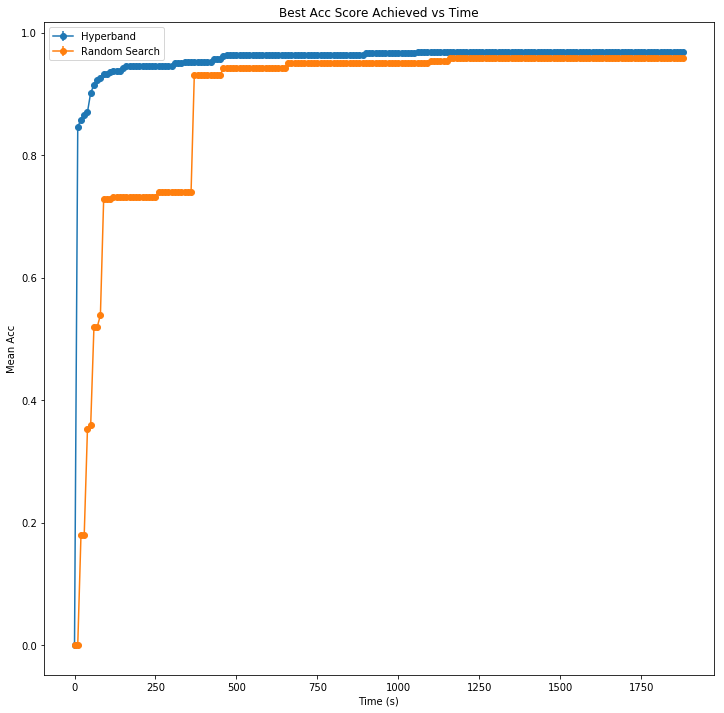

In [17]:
%matplotlib inline

# Plot random search vs hyperband run stats
import matplotlib.pyplot as plt
import matplotlib as mpl

print(runstats_hyperband)

xs_hyperband = [[x["time_elapsed"] for x in z] for z in runstats_hyperband]
ys_hyperband = [[x["best_score"] for x in z] for z in runstats_hyperband]
xs_rs = [[x["time_elapsed"] for x in z] for z in runstats_rs]
ys_rs = [[x["best_score"] for x in z] for z in runstats_rs]

# Extract min and max times for segmented times
flat_xs_hyperband = [item for sublist in xs_hyperband for item in sublist]
flat_xs_rs = [item for sublist in xs_rs for item in sublist]
min_time, max_time = 0, max(flat_xs_hyperband + flat_xs_rs)


# Get list of best scores at time
def get_best_scores_at_time(all_runstats, target_time):
    best_scores = []
    for runstats in all_runstats:
        best_score = 0        
        times = [x["time_elapsed"] for x in runstats]
        scores = [x["best_score"] for x in runstats]
        for time, score in zip(times, scores):
            if time < target_time:
                best_score = score
        best_scores.append(best_score)
    return best_scores
        
# Extract best scores per segment
segments = list(np.arange(0, max_time, 10))
hyperband_scores = [get_best_scores_at_time(runstats_hyperband, t) for t in segments]
rs_scores = [get_best_scores_at_time(runstats_rs, t) for t in segments]

# Extract means and error bars
mean_hyperband_scores = [np.mean(x) for x in hyperband_scores]
mean_rs_scores = [np.mean(x) for x in rs_scores]
#hyperband_stds = [np.std(x) for x in hyperband_scores]
#rs_stds = [np.std(x) for x in rs_scores]
hyperband_stds = [0 for x in hyperband_scores]
rs_stds = [0 for x in rs_scores]

#plt.plot(segments, mean_hyperband_scores, label="Hyperband", marker="o")
#plt.plot(segments, mean_rs_scores, label="Random Search", marker="o")
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.errorbar(segments, mean_hyperband_scores, hyperband_stds, label="Hyperband", marker="o")
plt.errorbar(segments, mean_rs_scores, rs_stds, label="Random Search", marker="o")
plt.legend(loc="best")
plt.title("Best Acc Score Achieved vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Mean Acc")

[[{'time_elapsed': 2.443284034729004, 'best_score': 0.75}, {'time_elapsed': 4.305577516555786, 'best_score': 0.85}, {'time_elapsed': 20.751783847808838, 'best_score': 0.86}, {'time_elapsed': 31.631431818008423, 'best_score': 0.87}, {'time_elapsed': 49.398895263671875, 'best_score': 0.9}, {'time_elapsed': 63.888325452804565, 'best_score': 0.92}, {'time_elapsed': 144.1331980228424, 'best_score': 0.94}, {'time_elapsed': 304.16861748695374, 'best_score': 0.96}, {'time_elapsed': 466.8608820438385, 'best_score': 0.97}], [{'time_elapsed': 1.2503845691680908, 'best_score': 0.69}, {'time_elapsed': 2.798210859298706, 'best_score': 0.76}, {'time_elapsed': 3.9354445934295654, 'best_score': 0.83}, {'time_elapsed': 24.741437435150146, 'best_score': 0.85}, {'time_elapsed': 48.75753998756409, 'best_score': 0.9}, {'time_elapsed': 78.73305010795593, 'best_score': 0.92}, {'time_elapsed': 87.92233657836914, 'best_score': 0.94}, {'time_elapsed': 108.99533939361572, 'best_score': 0.96}, {'time_elapsed': 898

Text(0,0.5,'Mean Acc')

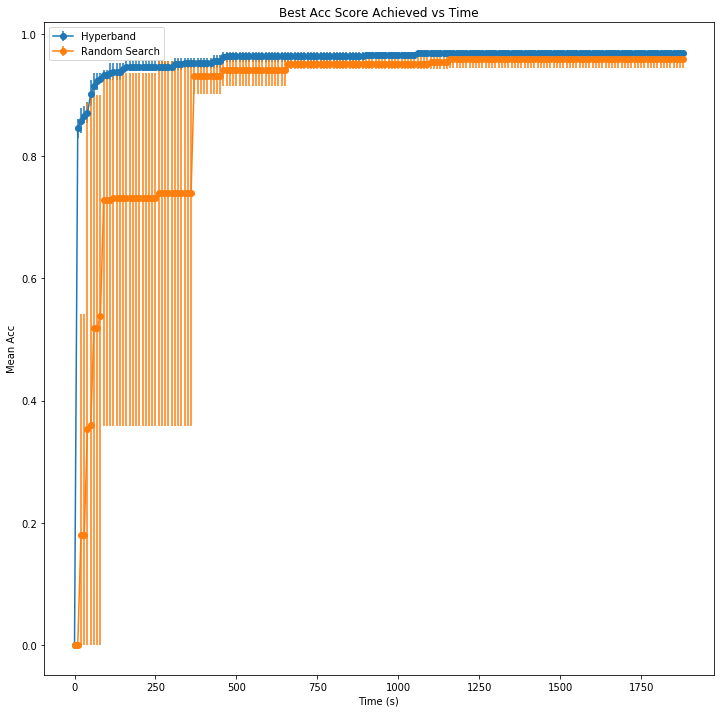

In [16]:
%matplotlib inline

# Plot random search vs hyperband run stats
import matplotlib.pyplot as plt
import matplotlib as mpl

print(runstats_hyperband)

xs_hyperband = [[x["time_elapsed"] for x in z] for z in runstats_hyperband]
ys_hyperband = [[x["best_score"] for x in z] for z in runstats_hyperband]
xs_rs = [[x["time_elapsed"] for x in z] for z in runstats_rs]
ys_rs = [[x["best_score"] for x in z] for z in runstats_rs]

# Extract min and max times for segmented times
flat_xs_hyperband = [item for sublist in xs_hyperband for item in sublist]
flat_xs_rs = [item for sublist in xs_rs for item in sublist]
min_time, max_time = 0, max(flat_xs_hyperband + flat_xs_rs)


# Get list of best scores at time
def get_best_scores_at_time(all_runstats, target_time):
    best_scores = []
    for runstats in all_runstats:
        best_score = 0        
        times = [x["time_elapsed"] for x in runstats]
        scores = [x["best_score"] for x in runstats]
        for time, score in zip(times, scores):
            if time < target_time:
                best_score = score
        best_scores.append(best_score)
    return best_scores
        
# Extract best scores per segment
segments = list(np.arange(0, max_time, 10))
hyperband_scores = [get_best_scores_at_time(runstats_hyperband, t) for t in segments]
rs_scores = [get_best_scores_at_time(runstats_rs, t) for t in segments]

# Extract means and error bars
mean_hyperband_scores = [np.mean(x) for x in hyperband_scores]
mean_rs_scores = [np.mean(x) for x in rs_scores]
hyperband_stds = [[-np.percentile(x, 10)+np.mean(x) for x in hyperband_scores], [np.percentile(x, 90)-np.mean(x) for x in hyperband_scores]]
rs_stds = [[-np.percentile(x, 10)+np.mean(x) for x in rs_scores], [np.percentile(x, 90)-np.mean(x) for x in rs_scores]]


#plt.plot(segments, mean_hyperband_scores, label="Hyperband", marker="o")
#plt.plot(segments, mean_rs_scores, label="Random Search", marker="o")
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.errorbar(segments, mean_hyperband_scores, hyperband_stds, label="Hyperband", marker="o")
plt.errorbar(segments, mean_rs_scores, rs_stds, label="Random Search", marker="o")
plt.legend(loc="best")
plt.title("Best Acc Score Achieved vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Mean Acc")